In [ ]:
!pip install opencv-python

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from PIL import Image
import io
from IPython.display import display

In [ ]:
# Upload image from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load image from Google Drive
image_path = '/content/drive/MyDrive/ColabNotebooks/mob.jpg'
sunglass_path = '/content/drive/MyDrive/ColabNotebooks/glass.png'

In [ ]:
# Load image and sunglasses (assuming transparency in sunglasses)
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Read with flag to preserve format
sunglasses = cv2.imread(sunglass_path, cv2.IMREAD_UNCHANGED)  # Replace with corrected image

In [ ]:
# Convert to grayscale and detect faces
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


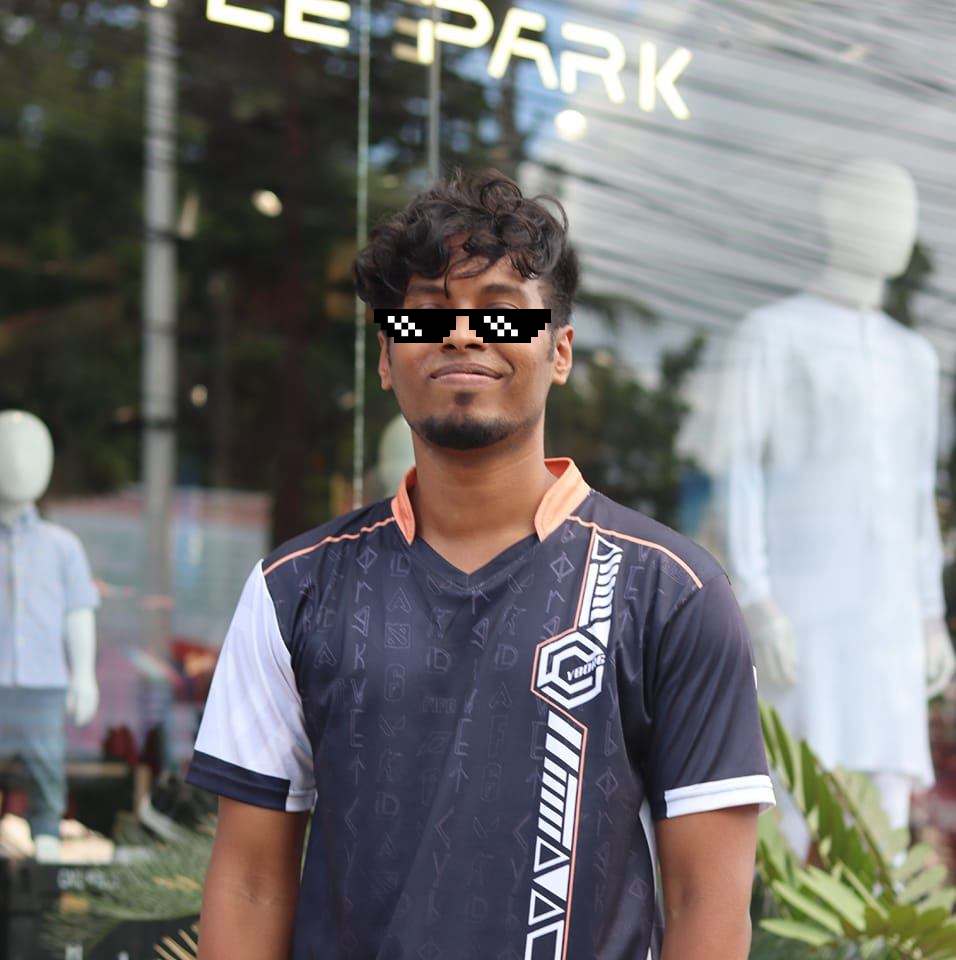

In [ ]:
import numpy as np

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Process each detected face
for (x, y, w, h) in faces:
    # Calculate the scaling factor to fit the sunglasses to the face width
    scale_factor = w / sunglasses.shape[1]

    # Calculate the resized sunglasses dimensions without warping
    resized_sunglasses_height = int(sunglasses.shape[0] * scale_factor)
    resized_sunglasses_width = w

    # Calculate the position of the sunglasses on the face
    center_x = x + w // 2
    center_y = y + h // 2

    # Calculate the sunglasses offset
    sunglasses_offset_x = center_x - resized_sunglasses_width // 2
    sunglasses_offset_y = center_y - resized_sunglasses_height // 2

    # Combine the face and sunglasses
    roi = image[sunglasses_offset_y:sunglasses_offset_y+resized_sunglasses_height,
                sunglasses_offset_x:sunglasses_offset_x+resized_sunglasses_width]

    # Resize the sunglasses image
    resized_sunglasses = cv2.resize(sunglasses, (resized_sunglasses_width, resized_sunglasses_height), interpolation=cv2.INTER_AREA)

    # Create a mask from the resized sunglasses alpha channel
    sunglasses_alpha = resized_sunglasses[:, :, 3] / 255.0
    sunglasses_mask = sunglasses_alpha.astype(np.bool_)

    # Overlay the sunglasses color channels onto the roi region using the mask
    roi[sunglasses_mask] = resized_sunglasses[:resized_sunglasses_height, :resized_sunglasses_width, :3][sunglasses_mask]

# Convert OpenCV image to PIL image
pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Display the result
display(pil_image)